# 問題１ 使用しているRDKitのバージョンを出力せよ。

In [1]:
from rdkit import rdBase, Chem
print(rdBase.rdkitVersion)

2019.09.3


RDKit WARNING: [15:49:28] Enabling RDKit 2019.09.3 jupyter extensions
[15:49:28] Enabling RDKit 2019.09.3 jupyter extensions


# 問題２ "l-ascorbic acid"をRDKitのmolファイルにしてjupyter notebook上に表示させよ。

In [2]:
import pubchempy as pcp
l_ascorbic_acid = pcp.get_compounds('l-ascorbic acid', 'name')
l_ascorbic_acid

[Compound(54670067)]

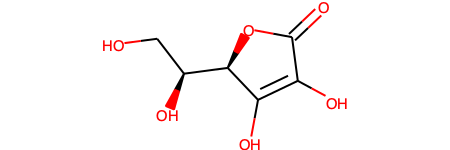

In [3]:
ascorbic_acid_mol = Chem.MolFromSmiles(l_ascorbic_acid[0].isomeric_smiles)
ascorbic_acid_mol 

# 問題３"l-ascorbic acid"のBertzCTの値を示せ。

In [4]:
from rdkit.Chem import Descriptors

In [5]:
Descriptors.BertzCT(ascorbic_acid_mol)

232.19280948873626

# 問題4 pubchemに示されたantioxidantのSDFファイルをダウンロードしてRDKitのPandasTools読み込め。また、読み込まれた中身のデータをランダムに列を1個表示させよ。行は、'PUBCHEM_COMPOUND_CID', 'ROMol'にすること。

https://pubchem.ncbi.nlm.nih.gov/#input_type=list&query=ZSLAZH_LGnctXRhEmjxRazUJ1Gmg6fGvi4rq45Cb-OKQgsQ&collection=compound&alias=ChemIDplus%3A%20Antioxidants

In [6]:
from rdkit.Chem import PandasTools

,PUBCHEM_COMPOUND_CID,ROMol
99,5280343,

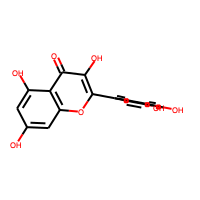

In [7]:
df = PandasTools.LoadSDF('data/PubChem_compound_list_antioxidant.sdf')
df = df[['PUBCHEM_COMPOUND_CID', 'ROMol']]
df.sample(1)

# 問題5 読み込んだSDFファイルのデータフレームに"smiles"の項目を追加し、ランダムに列を1個だけ表示せよ。

In [8]:
df["smiles"] = df["ROMol"].map(Chem.MolToSmiles)

,PUBCHEM_COMPOUND_CID,ROMol,smiles
104,5281571,,O=c1cccc2cc(O)c(O)c(O)c2c1O

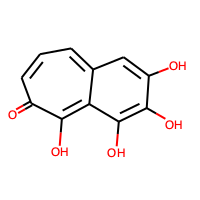

In [9]:
df.sample(1)

# 問題6 読み込んだSDFファイルのデータベースの化合物の中で"fr_Ar_OH", の項目が１以上である化合物だけのデータフレームを作成して個数を比べよ。

,PUBCHEM_COMPOUND_CID,ROMol,smiles,fr_Ar_OH
17,4534,,CC(Cc1ccc(O)c(O)c1)C(C)Cc1ccc(O)c(O)c1,4

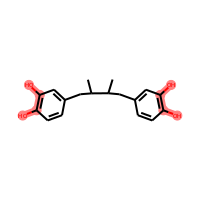

In [10]:
df["fr_Ar_OH"] = df["ROMol"].map(Descriptors.fr_Ar_OH)
df_phenol = df[df['fr_Ar_OH'] > 1]
df_phenol.sample(1)

In [11]:
# antioxidantのSDFにもともとあった個数
len(df)

122

In [12]:
# antioxidantのSDFにもともとあった中からフェノール 性OHを有するものの個数
len(df_phenol)

33